 # Questions:
 
 1. Is there any strong or weak correlation between rainfall & price of onion & Tomato ?
 2. Is there any differences of price between states / Regions?
 3. Is there any other factors apart from rainfall on the price of onion & Tomato?
 4. How to analyse the supply & demand and decide which crop to harvest as a farmer?
 5. which region is the best place to sell?
 6. Average price of Onions is 1300. Prove it with 95% confidence level


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy
import scipy.stats as stats


# import statsmodels
import statsmodels.api as sm

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

In [2]:
data=pd.read_csv('Onion_weekly.csv')

In [3]:
data.head()

,Year,CW,Location,Onion_Price,Rainfall
0,2015,1,Bangalore,1200.0,5.5
1,2015,2,Bangalore,1359.0,5.5
2,2015,3,Bangalore,1208.0,5.5
3,2015,4,Bangalore,1352.0,5.5
4,2015,5,Bangalore,1323.0,5.5


step 1: describe the data
Step 2 : plot the data with histogram, box plot, cross plot, heatmap (pearson correlation)
step 3 : check whether the data is normal and variances are equal and decide what tests can be done based on the questions (1 sample z test or t-test) - hypothesis testing
step 4 : Simulation
step 5 : Conclude with the suggestions based on test results

In [14]:
data.shape

(790, 5)

In [15]:
data.dtypes

Year             int64
CW               int64
Location        object
Onion_Price    float64
Rainfall       float64
dtype: object

In [16]:
data['Year']=data['Year'].astype('object',copy='False')
data['CW']=data['CW'].astype('object',copy='False')

In [17]:
data.dtypes

Year            object
CW              object
Location        object
Onion_Price    float64
Rainfall       float64
dtype: object

# description of the data

In [25]:
data.describe()

,Year,CW,Onion_Price,Rainfall
count,790.000000,790.000000,783.000000,790.000000
mean,2015.993671,26.835443,1536.393359,225.254430
std,0.815695,15.214087,880.497340,303.469795
min,2015.000000,1.000000,321.000000,0.000000
25%,2015.000000,14.000000,794.500000,9.500000
50%,2016.000000,27.000000,1391.000000,71.800000
75%,2017.000000,40.000000,1909.500000,375.800000
max,2017.000000,53.000000,5533.000000,1272.100000


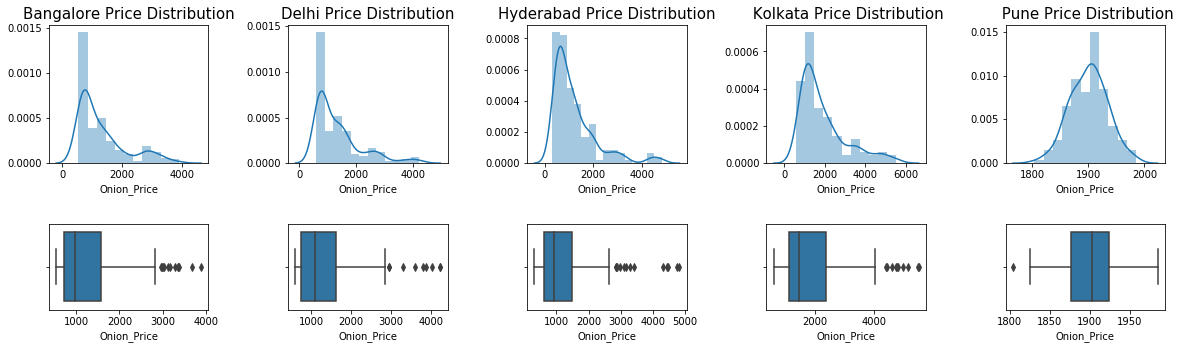

In [6]:
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = [20,10]
gs = gridspec.GridSpec(5,5, width_ratios=[15, 15, 15, 15, 15], height_ratios=[.80, .50, .15, .15, .15],hspace =1, wspace=0.5)
a1 = plt.subplot(gs[0, 0])
a1.set_title("Bangalore Price Distribution", fontsize=15)
a1=sns.distplot(data[data['Location']=='Bangalore']['Onion_Price'])

a2 = plt.subplot(gs[0, 1])
a2.set_title("Delhi Price Distribution", fontsize=15)
a2=sns.distplot(data[data['Location']=='Delhi']['Onion_Price'])

a3 = plt.subplot(gs[0, 2])
a3.set_title("Hyderabad Price Distribution", fontsize=15)
a3=sns.distplot(data[data['Location']=='Hyderabad']['Onion_Price'])

a4 = plt.subplot(gs[0, 3])
a4.set_title(" Kolkata Price Distribution", fontsize=15)
a4=sns.distplot(data[data['Location']=='Kolkata']['Onion_Price'])

a5 = plt.subplot(gs[0, 4])
a5.set_title(" Pune Price Distribution", fontsize=15)
a5=sns.distplot(data[data['Location']=='Pune']['Onion_Price'])

b1 = plt.subplot(gs[1, 0])
b1= sns.boxplot(data[data['Location']=='Bangalore']['Onion_Price'])

b2 = plt.subplot(gs[1, 1])
b2= sns.boxplot(data[data['Location']=='Delhi']['Onion_Price'])

b3 = plt.subplot(gs[1, 2])
b3= sns.boxplot(data[data['Location']=='Hyderabad']['Onion_Price'])


b4 = plt.subplot(gs[1, 3])
b4= sns.boxplot(data[data['Location']=='Kolkata']['Onion_Price'])

b5 = plt.subplot(gs[1, 4])
b5 = sns.boxplot(data[data['Location']=='Pune']['Onion_Price'])



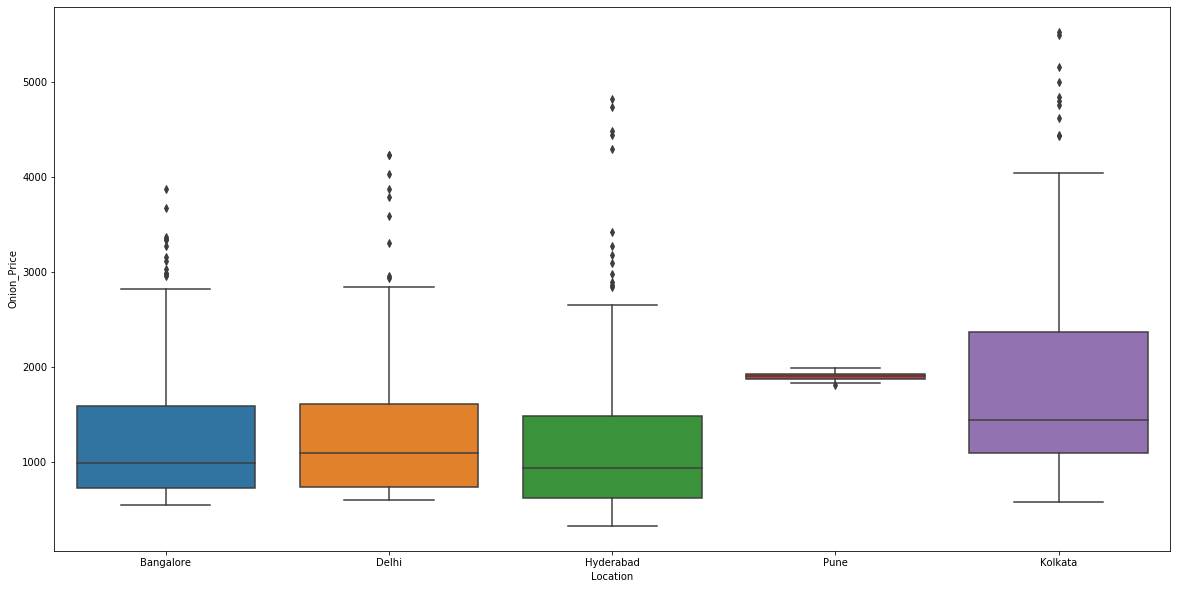

In [8]:
sns.boxplot(x='Location',y='Onion_Price', data=data)
plt.show()

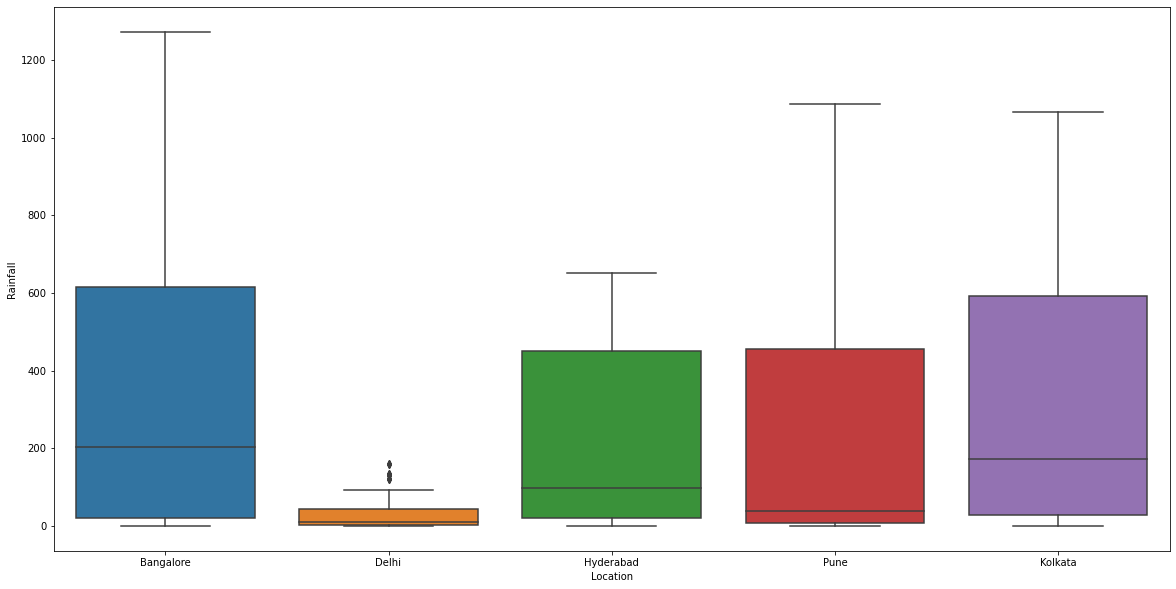

In [20]:
sns.boxplot(x='Location',y='Rainfall', data=data)
plt.show()


In [4]:
corr = data.corr()
corr

,Year,CW,Onion_Price,Rainfall
Year,1.000000,-0.013361,-0.227536,0.011832
CW,-0.013361,1.000000,0.326444,0.193348
Onion_Price,-0.227536,0.326444,1.000000,0.160111
Rainfall,0.011832,0.193348,0.160111,1.000000


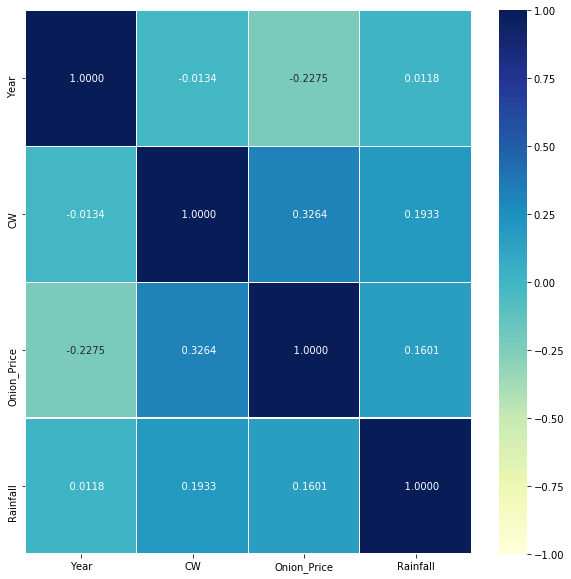

In [5]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()

# 3.How is the seasons affecting on the price of onion?


In [24]:
#Adding a date coulum
data['date'] = pd.to_datetime(data.CW.astype(str)+
                           data.Year.astype(str).add('-1') ,format='%V%G-%u')


In [ ]:
#Addition of seasons based on the dates. 
def season_of_date(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='01/02/'+year, end='31/03/'+year),
               'Summer': pd.date_range(start='01/04/'+year, end='30/06/'+year),
               'Monsoon': pd.date_range(start='01/07/'+year, end='15/09/'+year)}
    if date in seasons['Spring']:
        return 'Spring'
    if date in seasons['Summer']:
        return 'Summer'
    if date in seasons['Monsoon']:
        return 'Monsoon'
    else:
        return 'Winter'

# Assuming df has a date column of type `datetime`
data['season'] = data.date.map(season_of_date)

Null hypothesis = The onion price is same accross all the seasons

Alternate hypothesis= The onion price is not same accross all the seasons

Using ANOVA since we are trying to compare betweena categorical variable and a numerical variable
One-way ANOVA helps us to determine how the seasons impact the price ranges of onion. 

How does ANOVA work?
The ANOVA model starts by estimating the total amount of variation that exists Onion prices (this is why it is called Analysis of Variance).

In [ ]:
lm=ols('Onion_Price ~ season',data=data).fit()
table=sm.stats.anova_lm(lm)
print(table)

Degrees of freedom;
df1 = df of the explained part = number of groups — 1 (df1=3)
df2 = df of the residual = number of observations — number of groups(df2=790-4=786)

Sum of Squares:
    variation is mathematically measured by the Sum of Squares

In [28]:
#From the ANOVA table we know that
#Sum of squares
SS_Explained=1.556926e+08
SS_Residual=6.257951e+08

#Degrees of freedom
DF_Residual=786
DF_Explained=3

#Computing the Mean Squares
MS_Explained=SS_Explained/DF_Explained
MS_Residual=SS_Residual/DF_Residual

#ANOVA F-test
#Computing the F statistic
f=MS_Explained/MS_Residual
f

65.18341418780685

P-value
Compute the p-value

In [29]:
p_value=1-scipy.stats.f.cdf(f,DF_Explained,DF_Residual)
p_value

1.1102230246251565e-16

#Interpreting  p-value

We have to compare the p-value to our chosen alpha, in this case, 0,05.
Our p-value of 1.11 is less than 0,05, so we reject our null hypothesis and we accept our alternative. Even though the four season's sample means are different, we have a statistically significant difference.
This means that with the observed data, there is enough evidence to assume that the onion price is different accross all the seasons. Therefore we  refject the null hypothesis and agree that the seasons have impact on the onion price ranges amoung the four states.

# Hypothesis Testing:
#1. The prices of onions are compared between two years i.e. 2015 & 2017

Let 𝐹𝑋 be the distribution of onion prices in the year 2015 and 𝐹𝑌 be the distribution of onion prices in the year 2017.

Where,

The null and alternative hypothesis is:

H0: 𝐹𝑋=𝐹𝑌 H1: 𝐹𝑋≠𝐹𝑌

In [9]:
data_2015=data[data['Year']==2015]['Onion_Price']
#to check the normlity of the data
stat, p_value = shapiro(data_2015)
print('P-Value:', p_value)

P-Value: 3.7240303143125296e-17


From the above result, we can see that the p-value is less than 0.05, thus we can say that the Onion prices in the year 2015 is  not normally distributed

In [10]:
data_2017=data[data['Year']==2017]['Onion_Price']
#to check the normlity of the data
stat, p_value = shapiro(data_2017)
print('P-Value:', p_value)

P-Value: 1.0


From the above result, we can see that the p-value is more than 0.05, thus we can say that the Onion prices in the year 2017 is  normally distributed. 
Hence considering the above conditions, Mann-Whitney U Test will be applied for comparision

# Mann-Whitney U Test

In [24]:
test_stat, p_value = stats.mannwhitneyu(data_2015, data_2017, alternative = 'two-sided')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 42527.5
p-value: 3.356167763975583e-06


Here the p-value is lesser than 0.05. Thus we reject the null hypothesis and we can conclude that the average onion price is not same for both the years 2015 & 2017.

#2. The prices of onions are compared between two cities i.e. Bangalore & Kolkata

Let 𝐹𝑋 be the distribution of onion prices in the year Kolkata and 𝐹𝑌 be the distribution of onion prices in the year Bangalore.

Where,

The null and alternative hypothesis is:

H0: 𝐹𝑋<=𝐹𝑌 H1: 𝐹𝑋>𝐹𝑌

In [ ]:
data_bang_price=data[data['Location']=='Bangalore']['Onion_Price']
#to check the normlity of the data
stat, p_value = shapiro(data_bang_price)
print('P-Value:', p_value)

In [20]:
data_Kolk_price=data[data['Location']=='Kolkata']['Onion_Price']
#to check the normlity of the data
stat, p_value = shapiro(data_Kolk_price)
print('P-Value:', p_value)

P-Value: 1.0


In [23]:
test_stat, p_value = stats.mannwhitneyu(data_bang_price, data_Kolk_price, alternative = 'two-sided')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 6938.0
p-value: 8.70658145841571e-12


Here the p-value is lesser than 0.05. Thus we reject the null hypothesis and we can conclude that the average onion price of bangalore is less than that of Kolkata.